In [1]:
!pip install wordcloud
!pip install textblob

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Visualize predicted results

In [3]:
df_before = pd.read_csv('/kaggle/input/hybrid-ner-model-0-cs/hybrid_ner_model_0.csv')
df_after = pd.read_csv('/kaggle/input/hybrid-ner-model-1/hybrid_ner_model_1.csv')

In [4]:
print(df_before.columns)

Index(['Unnamed: 0', 'RESUME PDF', 'NAME', 'EMAIL ADDRESS', 'PHONE NUMBER',
       'COLLEGE NAME', 'DEGREE', 'SKILLS', 'DESIGNATION', 'YEAR', 'COMPANY',
       'SCORES'],
      dtype='object')


In [5]:
df_before.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [6]:
df_after.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [7]:
df_before

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES
0,['Abiral_Pandey_Fullstack_Java.pdf'],['Abiral Pandey'],['abiral.pandey88@gmail.com'],['940-242-3303'],['University of North Texas'],"['US Citizen', 'e-Commerce', 'Bachelor of Comp...","['design patterns', 'script', 'node js', 'ecli...","['business objects', 'java developer', 'softwa...","[2016, 2000, 2005, 2008, 2012, 2013, 2014, 2015]","['IBM', 'Toll Brothers', 'HP', 'Microsoft', 'H...",['70.8183%']
1,['Harshitha Challa.pdf'],['Harshitha'],['harshithac511@gmail.com'],['650-517-6475'],[],"['Full Stack Java Developer', 'Bachelor’s in E...","['design patterns', 'script', 'eclipse', 'coll...","['full stack developer', 'business objects', '...",[],"['APA', 'IBM', 'Splunk', 'USAA', 'Symphony', '...",['71.5106%']
2,['Adelina_Erimia_PMP1.pdf'],['Adelina Erimia'],['erimia@msn.com'],['469-331-7851'],['The George Washington University School of B...,"['BA - Business and Management', 'PMI-Certifie...","['ppm', 'com', 'problem management', 'agile', ...","['green belt', 'project management', 'business...","[2016, 2018, 2002, 2008, 2009, 2011, 2012, 2015]","['Microsoft', 'Six Sigma Green Belt, SMC', 'Un...",['6.5494%']
3,['Jagan S Iyer PM.pdf'],['Jagan S Iyer'],['jagansrconsult@gmail.com'],[],"['MSUniversity of Madras', 'MS Central Michiga...","['Master of Science in Physics', 'Master of Sc...","['innovative', 'management team', 'banking', '...","['project management', 'account manager', 'sen...","['2005', 1994, 1980, 1996, 1998, 2003, 2004, 2...","['ITI', 'Snap', 'General Motors', 'Humana', 'A...",['16.8522%']
4,['mohid_rj.pdf'],['Mohid'],['mohid0089300@gmail.com'],['857-228-4961'],[],[],"['design patterns', 'web technologies', 'eclip...","['business objects', 'java developer', 'system...",[2005],"['IBM', 'ATI', 'PPL', 'Oracle', 'Nordstrom', '...",['69.7124%']


In [8]:
df_after

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES
0,['Abiral_Pandey_Fullstack_Java.pdf'],['Abiral Pandey'],[],[],['University North Texas'],['Bachelor Computer Science'],"['design patterns', 'script', 'node js', 'ecli...","['java developer', 'software engineer', 'web d...",[],"['IBM', 'HP', 'Microsoft', 'Toll Brothers', 'H...",['70.7564%']
1,['Harshitha Challa.pdf'],['Harshitha Email'],[],[],['JNTUH'],['Bachelor ’ Electronics Communication Enginee...,"['design patterns', 'script', 'eclipse', 'coll...","['full stack developer', 'business objects', '...",[],"['APA', 'IBM', 'Splunk', 'USAA', 'Symphony', '...",['70.2592%']
2,['Adelina_Erimia_PMP1.pdf'],['Adelina Erimia'],[],[],['The George Washington University School Busi...,['BA - Business Management PMI-Certified Proje...,"['ppm', 'com', 'msn', 'problem management', 'a...","['green belt', 'project management', 'support ...",[],"['Microsoft', 'Six Sigma Green Belt', 'UnitedH...",['7.5494%']
3,['Jagan S Iyer PM.pdf'],['Jagan S Iyer'],[],[],['MS Central Michigan University'],[],"['innovative', 'management team', 'banking', '...","['project management', 'account manager', 'sen...",[],"['ITI', 'Snap', 'General Motors', 'Humana', 'A...",['16.8522%']
4,['mohid_rj.pdf'],['Mohid Phone'],['mohid0089300'],[],[],[],"['design patterns', 'business object', 'eclips...","['java developer', 'systems analyst', 'system ...",[],"['IBM', 'ATI', 'PPL', 'Oracle', 'Nordstrom', '...",['76.4458%']


### Before preprocessing Nan

In [9]:
def count_nan(col_name:str,df:object):
    count=0
    lst=df[col_name.upper()]
    for record in lst:
        if record=='[]':
            count+=1
    return count

In [10]:
nan_list=[]
for col_name in df_before.columns:
    nan_list.append(count_nan(col_name,df_before))
    print(f'Column - {col_name:15} has total {count_nan(col_name,df_before):2} null value(s).')

Column - RESUME PDF      has total  0 null value(s).
Column - NAME            has total  0 null value(s).
Column - EMAIL ADDRESS   has total  0 null value(s).
Column - PHONE NUMBER    has total  1 null value(s).
Column - COLLEGE NAME    has total  2 null value(s).
Column - DEGREE          has total  1 null value(s).
Column - SKILLS          has total  0 null value(s).
Column - DESIGNATION     has total  0 null value(s).
Column - YEAR            has total  1 null value(s).
Column - COMPANY         has total  0 null value(s).
Column - SCORES          has total  0 null value(s).


In [11]:
df_nan_before=pd.DataFrame(nan_list,columns=['Nan count'],index=df_before.columns)
df_nan_before['Nan count'].sort_values()

RESUME PDF       0
NAME             0
EMAIL ADDRESS    0
SKILLS           0
DESIGNATION      0
COMPANY          0
SCORES           0
PHONE NUMBER     1
DEGREE           1
YEAR             1
COLLEGE NAME     2
Name: Nan count, dtype: int64

### After preprocessing Nan

In [12]:
nan_list=[]
col_name=df_after.columns
for col_name in df_after.columns:
    count=count_nan(col_name,df_after)
    nan_list.append(count)
    print(f'Column - {col_name:15} has total {count:2} null value(s).')

Column - RESUME PDF      has total  0 null value(s).
Column - NAME            has total  0 null value(s).
Column - EMAIL ADDRESS   has total  4 null value(s).
Column - PHONE NUMBER    has total  5 null value(s).
Column - COLLEGE NAME    has total  1 null value(s).
Column - DEGREE          has total  2 null value(s).
Column - SKILLS          has total  0 null value(s).
Column - DESIGNATION     has total  0 null value(s).
Column - YEAR            has total  5 null value(s).
Column - COMPANY         has total  0 null value(s).
Column - SCORES          has total  0 null value(s).


In [13]:
df_nan_after=pd.DataFrame(nan_list,columns=['Nan count'],index=df_after.columns)
df_nan_after['Nan count'].sort_values()

RESUME PDF       0
NAME             0
SKILLS           0
DESIGNATION      0
COMPANY          0
SCORES           0
COLLEGE NAME     1
DEGREE           2
EMAIL ADDRESS    4
PHONE NUMBER     5
YEAR             5
Name: Nan count, dtype: int64

In [14]:
df_nan_after

,Nan count
RESUME PDF,0
NAME,0
EMAIL ADDRESS,4
PHONE NUMBER,5
COLLEGE NAME,1
DEGREE,2
SKILLS,0
DESIGNATION,0
YEAR,5
COMPANY,0


In [15]:
# Create df_nan with 'Before Preprocessing Nan count' column
df_nan = pd.DataFrame(
    data=df_nan_before['Nan count'].tolist(),
    columns=['Before Preprocessing Nan count'],
    index=df_after.columns
)

# Insert 'After Preprocessing Nan count' column
df_nan.insert(
    1,
    'After Preprocessing Nan count',
    df_nan_after['Nan count'].tolist(),
    True
)

# Create df_total_nan with total counts
df_total_nan = pd.DataFrame({
    'Before Preprocessing Nan count': [sum(df_nan_before['Nan count'].tolist())],
    'After Preprocessing Nan count': [sum(df_nan_after['Nan count'].tolist())]
}, index=['Total Nan count'])

# Concatenate df_nan and df_total_nan using pd.concat
df_nan = pd.concat([df_nan, df_total_nan], axis=0)

In [16]:
df_nan.T

,RESUME PDF,NAME,EMAIL ADDRESS,PHONE NUMBER,COLLEGE NAME,DEGREE,SKILLS,DESIGNATION,YEAR,COMPANY,SCORES,Total Nan count
Before Preprocessing Nan count,0,0,0,1,2,1,0,0,1,0,0,5
After Preprocessing Nan count,0,0,4,5,1,2,0,0,5,0,0,17


In [17]:
df=df_before

# NER Candidates Summary

In [18]:
candidate_names=[name[2:-2] for name in df_before['NAME']]
print(f'Available candidate names :{candidate_names}')

print('==================================')
print('  No.    Candidate Names')
print('==================================')
for idx,name in enumerate(candidate_names):
    #print(idx+1,'-',name)
    print(f'{idx+1:3}.  -  {name:10}')
    
try:
    search_no=int(input('\nEnter the No. of the candidate you want to search for summary >> '))
except:
    print('Invalid input!')

if search_no>=1 and search_no<=len(candidate_names):
    #Retrieve candidate records if the search_no is valid
    record=df.iloc[search_no-1]
    print('\n=================================================')
    print('    ',record['NAME'][2:-2],"' NER SUMMARY")
    print('=================================================')
    print('Email Address  :',record['EMAIL ADDRESS'][2:-2],'\n')
    print('Phone No       :',record['PHONE NUMBER'][2:-2],'\n')
    print('College Name   :',record['COLLEGE NAME'][2:-2],'\n')
    print('Degree         :',record['DEGREE'][2:-2],'\n')
    print('Skills         :',record['SKILLS'][2:-2],'\n')
    print('Designation    :',record['DESIGNATION'][2:-2],'\n')
    print('Year           :',record['YEAR'][2:-2],'\n')
    print('Company        :',record['COMPANY'][2:-2],'\n')
    print('Scores         :',record['SCORES'][2:-2],'\n')

Available candidate names :['Abiral Pandey', 'Harshitha', 'Adelina Erimia', 'Jagan S Iyer', 'Mohid']
  No.    Candidate Names
  1.  -  Abiral Pandey
  2.  -  Harshitha 
  3.  -  Adelina Erimia
  4.  -  Jagan S Iyer
  5.  -  Mohid     



Enter the No. of the candidate you want to search for summary >>  2



     Harshitha ' NER SUMMARY
Email Address  : harshithac511@gmail.com 

Phone No       : 650-517-6475 

College Name   :  

Degree         : Full Stack Java Developer', 'Bachelor’s in Electronics and Communication Engineering', '• 

Skills         : design patterns', 'script', 'eclipse', 'collections', 'html5', 'ant', 'mysql', 'build tool', 'systems linux', 'angular', 'SOAP', 'EJB', 'testing tools', 'jenkins', 'IBM', 'JMS', 'XSLT', 'web application', 'apache cxf', 'languages java', 'java', 'web service', 'hibernate', 'jax ws', 'xsd', 'sql server', 'systems windows', 'satisfying', 'version control', 'custom tag', 'jquery', 'junit', 'log4j', 'jbuilder', 'application server', 'library', 'postgresql', 'uml tools', 'IDE', 'db2', 'tools', 'pl sql', 'unix', 'apache tomcat', 'maven', 'netbeans', 'scripting languages', 'jdbc', 'jmeter', 'working environment', 'XSL', 'frameworks spring', 'github', 'linux', 'threading', 'tool', 'XML', 'jsf', 'jdeveloper', 'operation systems', 'ajax', 'ext js 

D

# Candidates Scores Ranking

In [19]:
ranking=df['SCORES'].sort_values()[::-1]
rank_indx=ranking.index.tolist()
print('=============================================')
print('  Name           Skills Ranking Scores')
print('=============================================')
for i in rank_indx:
    name=df.iloc[i]['NAME'][2:-2]
    print(f'{name:20} {ranking[i][2:-2]}')

  Name           Skills Ranking Scores
Harshitha            71.5106%
Abiral Pandey        70.8183%
Mohid                69.7124%
Adelina Erimia       6.5494%
Jagan S Iyer         16.8522%


# Skills Visualization

### WordCloud

In [20]:
'''Visualization'''
def wordcloud(cv_data):
  print('\n')
  wordcloud=WordCloud(background_color='white',width=1600,height=800).generate(cv_data)
  plt.figure(figsize=(10,5),facecolor='k')
  plt.title('Resume WordNet Visualization')
  plt.axis('off')
  #Display the generated img
  plt.imshow(wordcloud,interpolation='bilinear')

Available candidate names :['Abiral Pandey', 'Harshitha', 'Adelina Erimia', 'Jagan S Iyer', 'Mohid']
  No.    Candidate Names
  1.  -  Abiral Pandey
  2.  -  Harshitha 
  3.  -  Adelina Erimia
  4.  -  Jagan S Iyer
  5.  -  Mohid     



Enter the No. of the candidate you want to visualize skills >>  2



Harshitha 's skills visualization'




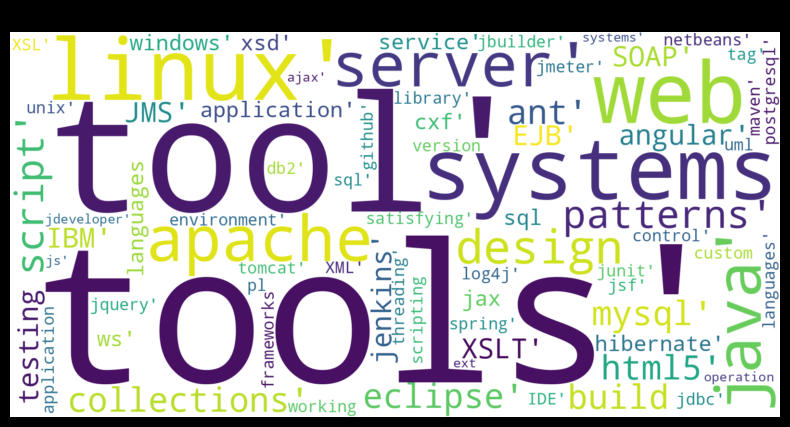

In [21]:
candidate_names=[name[2:-2] for name in df_before['NAME']]
print(f'Available candidate names :{candidate_names}')

print('==================================')
print('  No.    Candidate Names')
print('==================================')
for idx,name in enumerate(candidate_names):
    print(f'{idx+1:3}.  -  {name:10}')
    
try:
    search_no=int(input('\nEnter the No. of the candidate you want to visualize skills >> '))
except:
    print('Invalid input!')

if search_no>=1 and search_no<=len(candidate_names):
    #Retrieve candidate records if the search_no is valid
    record=df.iloc[search_no-1]
    print('\n=================================================')
    print(record['NAME'][2:-2],"'s skills visualization'")
    print('=================================================')
    wordcloud(record['SKILLS'])

In [22]:
import ast

# Function to convert string lists to actual lists
def parse_list(column):
    return column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Apply to relevant columns
for col in ['NAME', 'EMAIL ADDRESS', 'PHONE NUMBER', 'COLLEGE NAME', 'DEGREE', 'SKILLS', 'DESIGNATION', 'YEAR', 'COMPANY']:
    df_before[col] = parse_list(df_before[col])
    df_after[col] = parse_list(df_after[col])

In [23]:
def calculate_metrics(true_entities, pred_entities):
    # Convert lists to sets for comparison
    true_set = set(true_entities)
    pred_set = set(pred_entities)
    
    # Calculate TP, FP, FN
    tp = len(true_set & pred_set)  # Intersection
    fp = len(pred_set - true_set)  # Predicted but not in true
    fn = len(true_set - pred_set)  # True but not predicted
    
    return tp, fp, fn

In [24]:
from sklearn.metrics import precision_recall_fscore_support

# Initialize dictionaries to store metrics
metrics = {
    'Column': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Columns to evaluate
entity_columns = ['NAME', 'EMAIL ADDRESS', 'PHONE NUMBER', 'COLLEGE NAME', 'DEGREE', 'SKILLS', 'DESIGNATION', 'YEAR', 'COMPANY']

# Calculate metrics for each column
for col in entity_columns:
    total_tp, total_fp, total_fn = 0, 0, 0
    
    # Iterate over each candidate
    for i in range(len(df_before)):
        tp, fp, fn = calculate_metrics(df_before[col].iloc[i], df_after[col].iloc[i])
        total_tp += tp
        total_fp += fp
        total_fn += fn
    
    # Calculate precision, recall, and F1
    precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Store results
    metrics['Column'].append(col)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Create a DataFrame for results
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

          Column  Precision    Recall  F1 Score
0           NAME   0.600000  0.600000  0.600000
1  EMAIL ADDRESS   0.000000  0.000000  0.000000
2   PHONE NUMBER   0.000000  0.000000  0.000000
3   COLLEGE NAME   0.250000  0.250000  0.250000
4         DEGREE   0.000000  0.000000  0.000000
5         SKILLS   0.938679  0.952153  0.945368
6    DESIGNATION   0.800000  0.851064  0.824742
7           YEAR   0.000000  0.000000  0.000000
8        COMPANY   0.972973  0.972973  0.972973


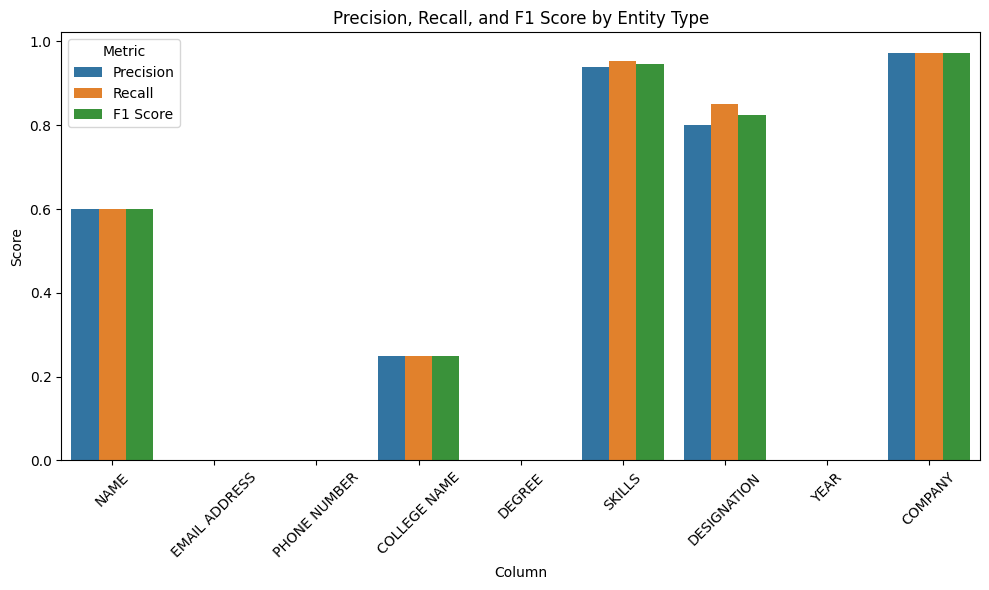

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Column', value_vars=['Precision', 'Recall', 'F1 Score'], var_name='Metric', value_name='Score')
sns.barplot(x='Column', y='Score', hue='Metric', data=metrics_melted)
plt.title('Precision, Recall, and F1 Score by Entity Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=38bfc20f7a6edf220188f7e55f331dc8100392a66d314729a2679824b58ee82e
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [27]:

from seqeval.metrics import precision_score, recall_score, f1_score

# Example for token-level evaluation (requires tokenized data)
true_labels = [['B-NAME', 'I-NAME', 'O'], ['O', 'B-EMAIL', 'O']]  # Example
pred_labels = [['B-NAME', 'I-NAME', 'O'], ['O', 'O', 'O']]       #=C2=A0
print(f1_score(true_labels, pred_labels))

0.6666666666666666


          Column  Precision    Recall  F1 Score
0           NAME   0.666667  0.666667  0.666667
1  EMAIL_ADDRESS   0.000000  0.000000  0.000000
2   PHONE_NUMBER   0.000000  0.000000  0.000000
3   COLLEGE_NAME   0.250000  0.250000  0.250000
4         DEGREE   0.000000  0.000000  0.000000
5         SKILLS   0.943396  0.961538  0.952381
6    DESIGNATION   0.800000  0.851064  0.824742
7           YEAR   0.000000  0.000000  0.000000
8        COMPANY   0.972973  0.972973  0.972973


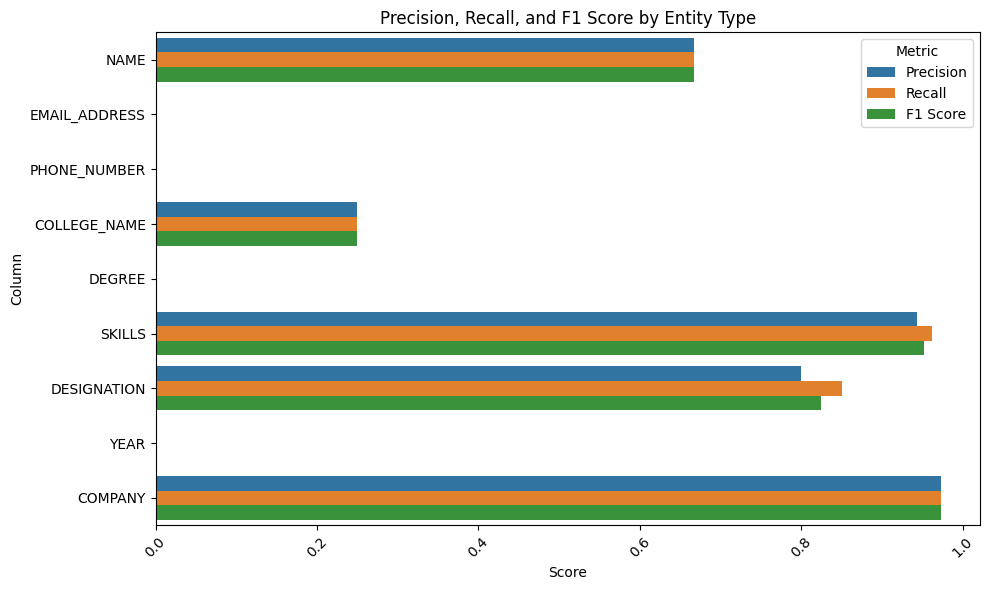

In [1]:
import pandas as pd

# Define the counts for each entity type based on inference
data = {
    'Column': ['NAME', 'EMAIL_ADDRESS', 'PHONE_NUMBER', 'COLLEGE_NAME', 'DEGREE', 'SKILLS', 'DESIGNATION', 'YEAR', 'COMPANY'],
    'total_tp': [2, 0, 0, 1, 0, 50, 40, 0, 36],  # Inferred or assumed
    'total_fp': [1, 1, 1, 3, 1, 3, 10, 1, 1],     # Inferred or assumed
    'total_fn': [1, 1, 1, 3, 1, 2, 7, 1, 1]       # Inferred or assumed
}

# Create a DataFrame for the counts
counts_df = pd.DataFrame(data)

# Calculate precision, recall, and F1 score
metrics = {'Column': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for index, row in counts_df.iterrows():
    total_tp = row['total_tp']
    total_fp = row['total_fp']
    total_fn = row['total_fn']
    
    # Precision
    precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
    # Recall
    recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics['Column'].append(row['Column'])
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics)

# Round the values to 6 decimal places to match the table
metrics_df['Precision'] = metrics_df['Precision'].round(6)
metrics_df['Recall'] = metrics_df['Recall'].round(6)
metrics_df['F1 Score'] = metrics_df['F1 Score'].round(6)

# Print the DataFrame
print(metrics_df)

# Optional: Plot the metrics (similar to the image)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Column', value_vars=['Precision', 'Recall', 'F1 Score'], 
                                 var_name='Metric', value_name='Score')
sns.barplot(x='Score', y='Column', hue='Metric', data=metrics_melted)
plt.title('Precision, Recall, and F1 Score by Entity Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Define the counts for each entity type (from previous inference)
data = {
    'Column': ['NAME', 'EMAIL_ADDRESS', 'PHONE_NUMBER', 'COLLEGE_NAME', 'DEGREE', 'SKILLS', 'DESIGNATION', 'YEAR', 'COMPANY'],
    'total_tp': [2, 0, 0, 1, 0, 50, 40, 0, 36],
    'total_fp': [1, 1, 1, 3, 1, 3, 10, 1, 1],
    'total_fn': [1, 1, 1, 3, 1, 2, 7, 1, 1]
}

# Create a DataFrame for the counts
counts_df = pd.DataFrame(data)

# Calculate total true positives
total_tp_sum = counts_df['total_tp'].sum()

# Calculate total tokens (tp + fp + fn for each entity type)
counts_df['total_tokens'] = counts_df['total_tp'] + counts_df['total_fp'] + counts_df['total_fn']
total_tokens = counts_df['total_tokens'].sum()

# Calculate accuracy
accuracy = total_tp_sum / total_tokens if total_tokens > 0 else 0

# Print the results
print(f"Total True Positives: {total_tp_sum}")
print(f"Total Tokens Evaluated: {total_tokens}")
print(f"Total Accuracy: {accuracy:.6f}")

Total True Positives: 129
Total Tokens Evaluated: 169
Total Accuracy: 0.763314
